<center><img width="460" height="300" src="https://upload.wikimedia.org/wikipedia/en/thumb/7/70/KAUST_Logo.svg/1200px-KAUST_Logo.svg.png"></center>
<h2><center>$$King~Abduallah~University~for~Science~and~Technology$$</center></h2>
<h2><center>$$\underline{\textbf{Course}}:~\color{Gold}{Geo-Environmental~Modeling}~\color{orange}{and}~\color{Turquoise}{Analysis}~(ErSE~316)$$</center></h2>
<h2><center>$$\underline{\textbf{Instructors:}}~\textbf{Hylke Beck} ~ \textbf{and} ~ \textbf{Yoshihide Wada} ~$$</center></h2>
<h2><center>$$\underline{\textbf{Student:}}~Sofien~Resifi$$</center></h2>
<h3><center>$$\underline{\textbf{Assignment 6}}$$</center></h3>

# Github Link

"https://github.com/resifis/geo_env/blob/main/Assignment6/"

# Needed Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import warnings
import tools
import seaborn as sns
warnings.filterwarnings("ignore")

# Part 1: Data Download

In [2]:
# import cdsapi

# dataset = "reanalysis-era5-single-levels"
# request = {
#     "product_type": ["reanalysis"],
#     "variable": [
#         "2m_temperature",
#         "total_precipitation"
#     ],
#     "year": [
#         "2019", "2020", "2021",
#         "2022", "2023", "2024"
#     ],
#     "month": [
#         "01", "02", "03",
#         "04", "05", "06",
#         "07", "08", "09",
#         "10", "11", "12"
#     ],
#     "day": [
#         "01", "02", "03",
#         "04", "05", "06",
#         "07", "08", "09",
#         "10", "11", "12",
#         "13", "14", "15",
#         "16", "17", "18",
#         "19", "20", "21",
#         "22", "23", "24",
#         "25", "26", "27",
#         "28", "29", "30",
#         "31"
#     ],
#     "time": [
#         "00:00", "01:00", "02:00",
#         "03:00", "04:00", "05:00",
#         "06:00", "07:00", "08:00",
#         "09:00", "10:00", "11:00",
#         "12:00", "13:00", "14:00",
#         "15:00", "16:00", "17:00",
#         "18:00", "19:00", "20:00",
#         "21:00", "22:00", "23:00"
#     ],
#     "data_format": "netcdf",
#     "download_format": "unarchived",
#     "area": [23, 39, 22, 40]
# }

# client = cdsapi.Client()
# client.retrieve(dataset, request).download()


In [3]:
data_path = "ERA5.nc"
dset = xr.open_dataset(data_path)

# Part 2: Data Pre-Processing

In [4]:
t2m = np.array(dset.variables["t2m"])
tp = np.array(dset.variables["tp"])
latitude = np.array(dset.variables["latitude"])
longitude = np.array(dset.variables["longitude"])
time_dt = np.array(dset.variables["time"])

In [5]:
# Converting air temperature to C and total precipitation to mm h-1
t2m = t2m - 273.15
tp = tp * 1000

In [6]:
# Averaging dimension 1.
if t2m.ndim == 4:
    t2m = np.nanmean(t2m, axis=1)
    tp = np.nanmean(tp, axis=1)

In [7]:
df_era5 = pd.DataFrame(index=time_dt)
df_era5["t2m"] = t2m[:,3,2]
df_era5["tp"] = tp[:,3,2]

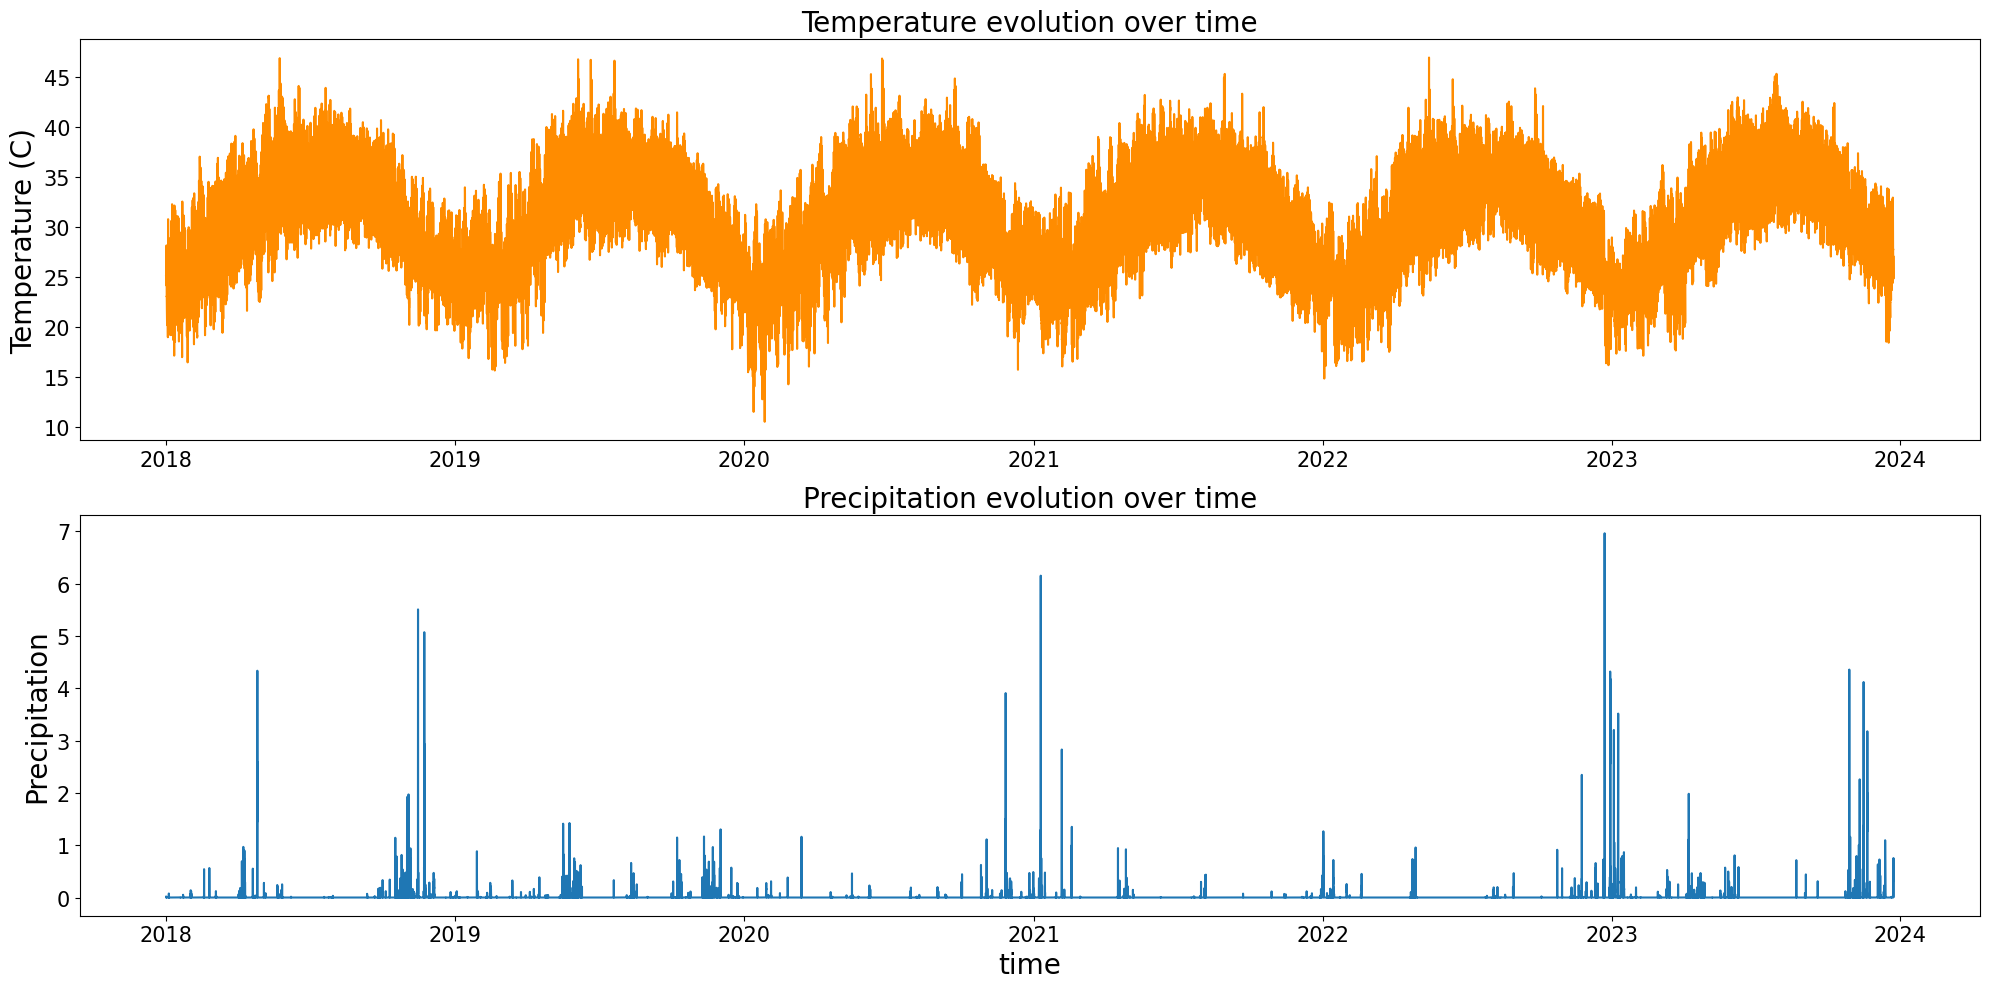

In [8]:
plt.figure(figsize = (20,10))
plt.subplot(211)
plt.title("Temperature evolution over time",fontsize = 20)
plt.plot(df_era5["t2m"],color = "darkorange")
plt.ylabel("Temperature (C)",fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.subplot(212)
plt.title("Precipitation evolution over time",fontsize = 20)
plt.plot(df_era5["tp"])
plt.ylabel("Precipitation",fontsize = 20)
plt.xlabel("time",fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.tight_layout()
plt.show()

$\large \textbf{8. What is the average annual precipitation in mm y$^{−1?}$}$

In [9]:
annual_precip = df_era5["tp"].resample("YE").mean()*24*365.25
mean_annual_precip = np.nanmean(annual_precip)

In [10]:
print("Annual mean precipitation = ",mean_annual_precip)

Annual mean precipitation =  88.3465520792712


The annual precipitation in mm y$^{-1}$ is equal to $\textbf{88.34}$

$ \large \textbf{9. Do you notice any trends in the time series for air temperature and/or precipitation?}$

We can observe a clear yearly pattern in the temperature data, with the lowest temperatures occurring during winter and the highest during summer. This pattern is closely linked to the total precipitation trends. The highest precipitation values coincide with the lowest temperatures, which aligns with the fact that winter is typically the wettest season. This correlation makes sense, as rainfall is more prevalent during the colder months.

$\large \textbf{10 .How reliable do think the data on precipitation and air temperature are?}$
$\large \textbf{Discuss whether one might be more reliable than the other.}$

ERA5 data is generally more reliable for temperature than precipitation, which means that temperature data tends to be more accurate. This is because temperature is easier to measure and varies more smoothly in space and time, making it simpler to model and validate with observations from weather stations and satellites. Precipitation, on the other hand, is trickier to pin down due to its high variability and the complexity of processes like cloud formation and rainfall. While ERA5 does a good job overall, precipitation estimates can be less reliable in areas with sparse ground observations. Furthermore, ERA5 is considerened to be a coarse resolution dataset which generally misses the convective scale features like convective precipitation.

# Part 3: Calculation of Potential Evaporation (PE)

In [11]:
tmin = df_era5["t2m"].resample("D").min().values
tmax = df_era5["t2m"].resample("D").max().values
tmean = df_era5["t2m"].resample("D").mean().values
lat = 21.25
doy = df_era5["t2m"].resample("D").mean().index.dayofyear

In [12]:
pe = tools.hargreaves_samani_1982(tmin, tmax, tmean, lat, doy)

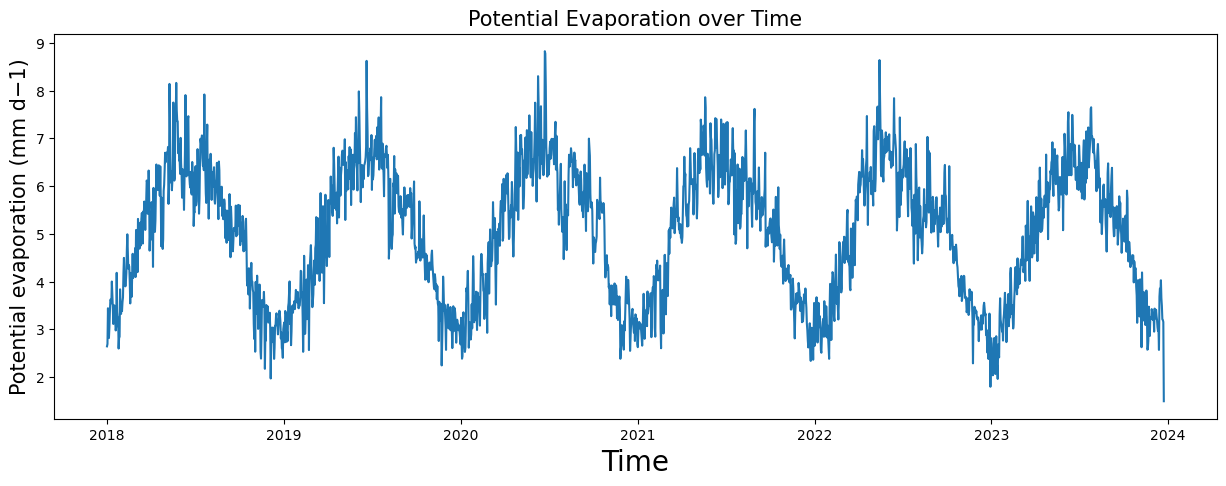

In [13]:
ts_index = df_era5["t2m"].resample("D").mean().index
plt.figure(figsize = (15,5))
plt.title("Potential Evaporation over Time",fontsize = 15)
plt.plot(ts_index, pe, label="Potential Evaporation")
plt.xlabel("Time",fontsize = 20)
plt.ylabel("Potential evaporation (mm d−1)",fontsize = 15)
plt.show()

$\large \textbf{4. What is the mean annual PE in mm y$^−1$?}$

In [14]:
PE_dataframe = pd.DataFrame(index=ts_index)
PE_dataframe["pe"] = pe
annual_pe = PE_dataframe["pe"].resample("YE").mean()*365.25
mean_annual_pe = np.nanmean(annual_pe)
print("Annual Potential Evaporation per year = ",mean_annual_pe)

Annual Potential Evaporation per year =  1826.8856


$\large \textbf{5. Based on the mean annual PE, what is the volume of water potentially}$
$\large \textbf{lost from the reservoir through evaporation annually?}$

We can write the volume potentially lost annually as follow:
$$V_{lost} = Area \times PE$$
$$V_{lost} = (1.6~Km^{2}) \times (1826.885~mmy^{-1})$$
$$V_{lost} = (1.6. 10^{6} m^2) \times (1.826~my^{-1})$$
Finally the volume lost per year is equal to: 
$$V_{lost} = 2,921,600~m^{3}y^{-1}$$

$\large \textbf{6. Do you think evaporation from open water is generally higher or lower}$ 
$\large \textbf{than evaporation from a grass surface?}$

Evaporation from open water is generally higher than evaporation from a grass surface because open water has a continuous supply of water available for evaporation, whereas grass surfaces have limited water availability, especially if the soil is dry. Besider, Grass surfaces have vegetation that can reduce evaporation by shading the soil and retaining moisture.

$\large \textbf{7. Do you consider 1.6 km$^2$ to be a good estimate for the average area of the reservoir?}$

Form the web site the estimated area is around 1.51 km$^2$ which means that 1.6 km$^2$ is a $\textbf{good}$ estimate for the average area of the reservoir.

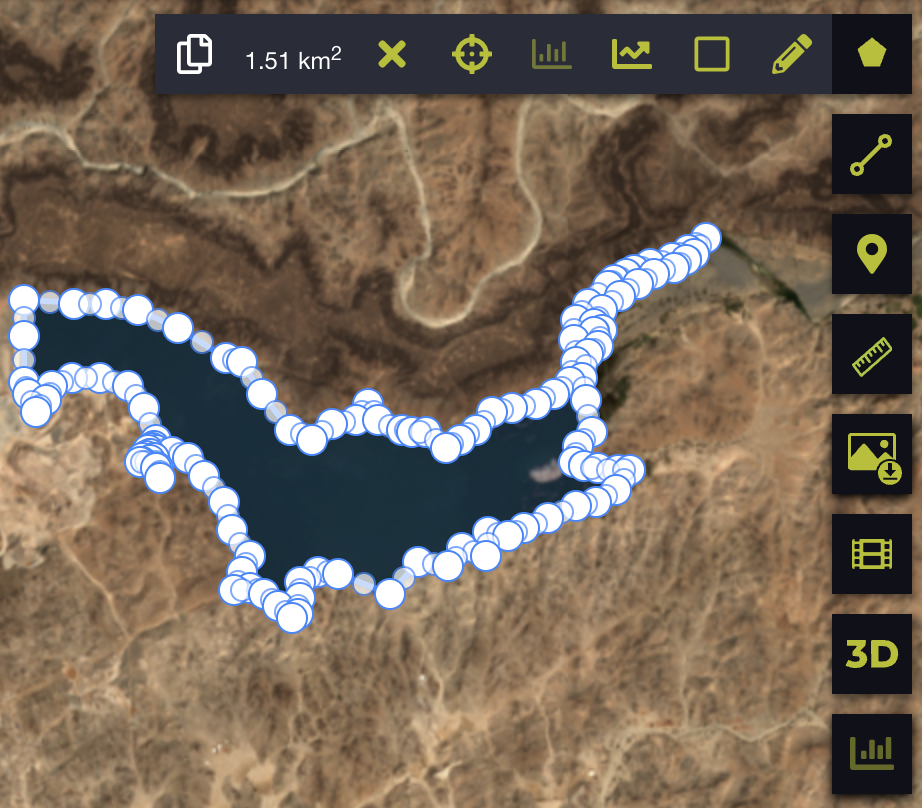